In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from capstone_methods import *

import warnings
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [9]:
file = r"C:\Users\cstens4\Desktop\Code\Capstone\Excel Files\foreveralone.xlsx"
df = pd.read_excel(file, 'Sheet1')

In [10]:
df_org = df.copy()

## Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 636 non-null    object
 1   sexuality              636 non-null    object
 2   genderSexuality        636 non-null    int64 
 3   age                    636 non-null    int64 
 4   income                 636 non-null    object
 5   race                   636 non-null    object
 6   bodyweight             636 non-null    object
 7   virgin                 636 non-null    object
 8   prostitution_legal     636 non-null    object
 9   pay_for_sex            636 non-null    object
 10  friends                636 non-null    int64 
 11  social_fear            636 non-null    object
 12  depressed              636 non-null    object
 13  what_help_from_others  636 non-null    object
 14  employment             636 non-null    object
 15  education              

In [12]:
df.describe()

,genderSexuality,age,friends
count,636.000000,636.000000,636.000000
mean,4.000000,23.963836,5.253145
std,1.586359,5.934308,5.477836
min,0.000000,12.000000,0.000000
25%,2.000000,20.000000,1.000000
50%,5.000000,23.000000,4.000000
75%,5.000000,27.000000,7.000000
max,5.000000,70.000000,40.000000


In [13]:
df.head(10)

,gender,sexuality,genderSexuality,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,employment,education,improve_yourself_how,attempt_suicide
0,Male,Straight,5,17,0,White non-Hispanic,Underweight,Yes,No,Yes but I haven't,2,Yes,Yes,"wingman/wingwoman, date coaching",A student,High school graduate / GED,Therapy,No
1,Male,Straight,5,21,0,Mixed Race,Normal weight,Yes,Yes,Yes but I haven't,10,Yes,No,Just want mates that make it look like I fit in,A student,Bachelor's Degree,"Joined a gym/go to the gym, join clubs/socual ...",No
2,Female,Straight,2,22,0,Asian,Normal weight,Yes,Yes,No,0,Yes,Yes,Set me up with a date,Out of work but not currently looking for work,"Some college, no degree",Joined a gym/go to the gym,No
3,Female,Straight,2,23,0,White non-Hispanic,Underweight,Yes,No,No,10,Yes,Yes,I don't want help,Out of work but not currently looking for work,Associate degree,None,No
4,Female,Straight,2,31,"$20,000 to $29,999",White non-Hispanic,Normal weight,No,No,No,4,Yes,Yes,I don't want help,Employed for wages,"Some college, no degree",None,No
5,Female,Gay/Lesbian,1,35,"$1 to $10,000",Black,Obese,No,No,No,3,Yes,Yes,"wingman/wingwoman, Set me up with a date",Out of work but not currently looking for work,"Some college, no degree","Therapy, join clubs/socual clubs/meet ups",No
6,Male,Straight,5,25,0,White non-Hispanic,Underweight,Yes,No,No,0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",A student,"Some college, no degree","Joined a gym/go to the gym, Therapy, Other exe...",Yes
7,Male,Straight,5,20,"$1 to $10,000",White non-Hispanic,Normal weight,Yes,Yes,No,20,Yes,No,I don't want help,A student,"Some college, no degree",Other exercise,No
8,Male,Straight,5,29,"$75,000 or more",Black,Overweight,Yes,No,Yes but I haven't,2,Yes,Yes,not sure what would help,Self-employed,"Some college, no degree","Joined a gym/go to the gym, Therapy, Other exe...",Yes
9,Male,Straight,5,25,0,White non-Hispanic,Normal weight,No,Yes,Yes and I have,7,No,No,I don't want help,A student,High school graduate / GED,"Joined a gym/go to the gym, Other exercise",No


In [14]:
columns = ['gender', 'sexuality', 'race', 'bodyweight', 'employment', 'education']

for column in columns:
    print('{} : {}'.format(column, df[column].unique().tolist()))
    print()

gender : ['Male', 'Female']

sexuality : ['Straight', 'Gay/Lesbian', 'Bisexual']

race : ['White non-Hispanic', 'Mixed Race', 'Asian', 'Black', 'Hispanic (of any race)']

bodyweight : ['Underweight', 'Normal weight', 'Obese', 'Overweight']

employment : ['A student', 'Out of work but not currently looking for work', 'Employed for wages', 'Self-employed', 'Out of work and looking for work', 'Other', 'Unable to work']

education : ['High school graduate / GED', "Bachelor's Degree", 'Some college, no degree', 'Associate degree', 'Masters Degree or Higher', 'Some high school, no diploma', 'Trade/technical/vocational training']



In [15]:
for column in columns:
    print(df[column].value_counts())
    print()

Male      472
Female    164
Name: gender, dtype: int64

Straight       556
Bisexual        64
Gay/Lesbian     16
Name: sexuality, dtype: int64

White non-Hispanic        462
Asian                      67
Hispanic (of any race)     47
Black                      33
Mixed Race                 27
Name: race, dtype: int64

Normal weight    375
Overweight       152
Underweight       74
Obese             35
Name: bodyweight, dtype: int64

A student                                         236
Employed for wages                                223
Out of work and looking for work                   59
Out of work but not currently looking for work     53
Self-employed                                      27
Unable to work                                     26
Other                                              12
Name: employment, dtype: int64

Some college, no degree                193
Bachelor's Degree                      155
High school graduate / GED             131
Some high school, no dipl

In [16]:
df.employment.value_counts()

A student                                         236
Employed for wages                                223
Out of work and looking for work                   59
Out of work but not currently looking for work     53
Self-employed                                      27
Unable to work                                     26
Other                                              12
Name: employment, dtype: int64

### Encoding Categorical Data

#### Ordinal Data:

In [17]:
income_dict = {'$0' : 0,
               '$1 to $10,000' : 1,
               '$10,000 to $19,999' : 2,
               '$20,000 to $29,999' : 3,
               '$30,000 to $39,999' : 4,
               '$40,000 to $49,999' : 5,
               '$50,000 to $74,999' : 6,
               '$75,000 or more' : 7
              }

df.replace({'income' : income_dict}, inplace=True)

In [18]:
edu_dict = {'Some high school, no diploma' : 0,
            'High school graduate / GED' : 1,
            'Trade/technical/vocational training' : 2,
            'Some college, no degree' : 3,
            'Associate degree' : 4,
            'Bachelor\'s Degree' : 5,
            'Masters Degree or Higher' : 6
           }

df.replace({'education' : edu_dict}, inplace=True)

In [19]:
df['bodyweight'] = df['bodyweight'].map({'Underweight' : 0,
                                         'Normal weight' : 1,
                                         'Overweight' : 2,
                                         'Obese' : 3})

#### Nominal Data:

In [20]:
df['gender'] = df['gender'].map({'Male' : 1,
                                'Female' : 0})

In [21]:
df['employment'] = df['employment'].astype('category')

df['employment'] = df['employment'].cat.codes

In [22]:
df['race'] = df['race'].astype('category')
df['race'] = df['race'].cat.codes

In [23]:
df['sexuality'] = df['sexuality'].astype('category')

df['sexuality'] = df['sexuality'].cat.codes

In [24]:
df['pay_for_sex'] = df['pay_for_sex'].map({'No' : 0,
                                          'Yes but I haven\'t' : 1,
                                          'Yes and I have' : 2})

In [25]:
df

,gender,sexuality,genderSexuality,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,employment,education,improve_yourself_how,attempt_suicide
0,1,2,5,17,0,4,0,Yes,No,1,2,Yes,Yes,"wingman/wingwoman, date coaching",0,1,Therapy,No
1,1,2,5,21,0,3,1,Yes,Yes,1,10,Yes,No,Just want mates that make it look like I fit in,0,5,"Joined a gym/go to the gym, join clubs/socual ...",No
2,0,2,2,22,0,0,1,Yes,Yes,0,0,Yes,Yes,Set me up with a date,4,3,Joined a gym/go to the gym,No
3,0,2,2,23,0,4,0,Yes,No,0,10,Yes,Yes,I don't want help,4,4,None,No
4,0,2,2,31,3,4,1,No,No,0,4,Yes,Yes,I don't want help,1,3,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1,2,5,19,2,4,2,Yes,No,0,6,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",0,3,Other exercise,No
632,1,2,5,24,4,4,2,No,No,0,6,No,No,I don't want help,1,3,"Other exercise, Joined the US Navy",No
633,1,2,5,29,2,4,1,Yes,No,1,1,Yes,Yes,Set me up with a date,1,1,Other exercise,No
634,1,2,5,26,0,4,2,Yes,No,0,3,Yes,No,wingman/wingwoman,4,0,Other exercise,No


#### Other Data:

The formatting of this column is not great from an analytic point of view.  The option to check off as many or as few options that apply leaves many single values.  To work with this, I'm going to break it down into how many things a person has done to try and improve themselves, if any at all.

In [26]:
df['total_improves'] = df['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'None'])) 

---

In [27]:
df = df[df['friends'] <= 20]
df['friends'] = df['friends'].astype('int')

In [28]:
def sort_friends(x):
    if 0 <= x < 5:
        return 0
    if 5 <= x < 10:
        return 1
    if 10 <= x < 15:
        return 2
    if 15 <= x < 20:
        return 3
    if x >= 20:
        return 4

In [29]:
# df['friend_bin'] = df['friends'].apply(sort_friends)

---

Because of formatting issues from the column what_help_from_others, I created a column that distinguished between whether the respondent was open to help from those in their life.

In [30]:
def help_or_no(x):
    '''
    INPUT: One value from the column what help from others
    OUTPUT: 0 if response was I dont want help
            1 if response included any combination of items signaling desire of external help from others
    '''
    
    if x == 'I don\'t want help':
        return 0
    else:
        return 1
    

In [31]:
df['open_to_help'] = df['what_help_from_others'].apply(help_or_no)

---

In [32]:
df = df[df['age'] <= 45]

In [33]:
def sort_age(x):
    if 0 <= x <= 19:
        return 0
    elif 20 <= x <= 39:
        return 1
    elif x >= 40:
        return 2

In [34]:
# df['age_bin'] = df['age'].apply(sort_age)

---

Encoding the last of the string variables, this will encode the values of columns such as depressed, suicide_attempt, and virgin

In [35]:
df.replace({'No' : 0, 'Yes' : 1}, inplace=True)

In [36]:
df_binary = df[['gender', 'virgin', 'depressed', 'social_fear', 'attempt_suicide', 'open_to_help']]

### Visualizations

<AxesSubplot:xlabel='age', ylabel='count'>

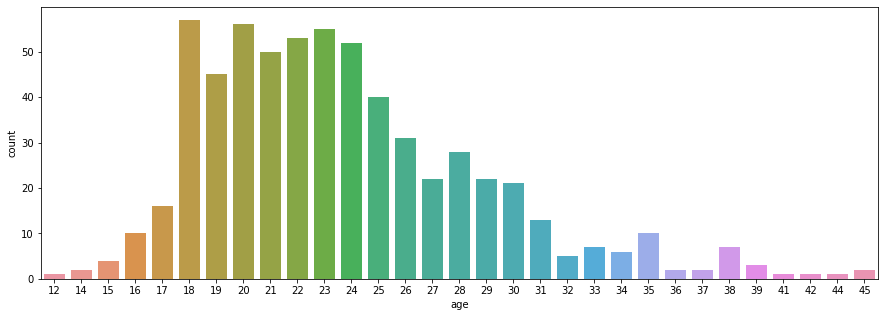

In [37]:
plt.figure(figsize=(15,5))
sns.countplot('age', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

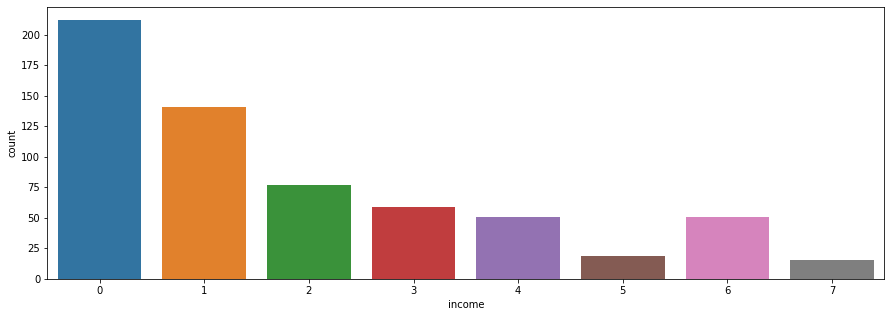

In [38]:
plt.figure(figsize=(15,5))

sns.countplot('income', data=df)

<AxesSubplot:xlabel='friends', ylabel='Count'>

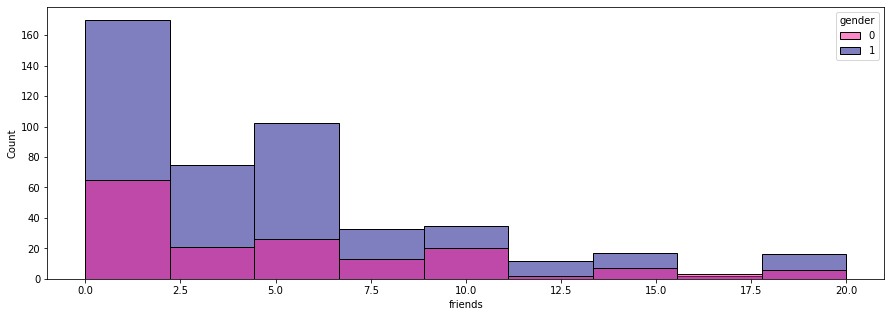

In [39]:
plt.figure(figsize=(15,5))
custom_pal = ['deeppink', 'navy']
sns.set_palette(custom_pal)
sns.histplot(data=df, x='friends', hue='gender', bins=9)

<AxesSubplot:xlabel='attempt_suicide', ylabel='count'>

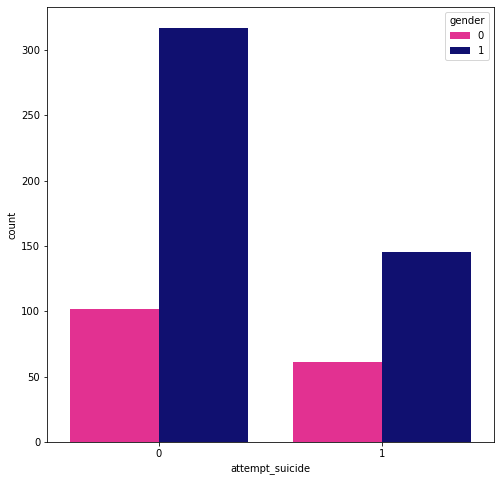

In [40]:
plt.figure(figsize=(8,8))
sns.countplot('attempt_suicide', hue='gender', data=df)

In [41]:
df.drop(['what_help_from_others', 'improve_yourself_how'], axis=1, inplace=True)

## Frequency Counts

Frequency Count tables are a way to explore the frequency and percentage distribution of categorical variables, and those counts are necessary to obtain for the chi square tests.

## Frequency Tables and Chi Square Tests

H0 - There is no association between the variables (Independent) </br>
H1 - There is an association between the variables (Dependent) </br>
</br>
A result as dependent allows us to reject the null hypothesis in saying there is some type of association or relationship between variables.  

### Gender Relationships

**Gender and Depression**

In [42]:
freq_table(df.depressed, df.gender)

gender       0    1
depressed          
0           61  155
1          102  307


In [43]:
data = np.array([[61,155], [102,307]])

stat = chi_test(data)

P-value is: 0.3712826819469903
Chi Statistic is: 0.799367038668654
No association


**Gender and Sexuality**

In [44]:
freq_table(df.sexuality, df.gender)

gender       0    1
sexuality          
0           37   24
1            7    8
2          119  430


In [45]:
data = np.array([[37, 24], [7, 8], [119, 430]])

stat = chi_test(data)

P-value is: 7.41993104448706e-11
Chi Statistic is: 46.64853251798842
There is an association between variables


In [46]:
cramerStat(data, stat)

0.27319892391585565
Moderate


**Gender and Employment**

In [47]:
freq_table(df.gender, df.employment)

employment    0    1  2   3   4   5   6
gender                                 
0            60   54  3  15  14   6  11
1           175  164  8  44  37  19  15


In [48]:
data = np.array([[60,54,3,15,14,6,11],[175,164,8,44,37,19,15]])

stat = chi_test(data)

P-value is: 0.6889686448284489
Chi Statistic is: 3.9091562369535913
No association


**Gender and Race**

In [49]:
freq_table(df.gender, df.race)

race     0   1   2   3    4
gender                     
0       19  13  15   6  110
1       48  20  32  21  341


In [50]:
data = np.array([[19,13,15,6,110], [48,20,32,21,341]])

stat = chi_test(data)

P-value is: 0.2954886482173724
Chi Statistic is: 4.921106734907566
No association


**Gender and Income**

In [51]:
freq_table(df.gender, df.income)

income    0    1   2   3   4   5   6   7
gender                                  
0        55   33  19  21   7   8  17   3
1       157  108  58  38  44  11  34  12


In [52]:
data = np.array([[55,33,19,21,7,8,17,3], [157,108,58,38,44,11,34,12]])

stat = chi_test(data)

P-value is: 0.11367529460224107
Chi Statistic is: 11.622539270865056
No association


### Depression Relationships

**Depression and Social Fear**

In [53]:
freq_table(df.social_fear, df.depressed)

depressed      0    1
social_fear          
0            112   88
1            104  321


In [54]:
data = np.array([[112,88],[104,321]])

stat = chi_test(data)

P-value is: 1.0609284096379898e-14
Chi Statistic is: 59.779684761706896
There is an association between variables


In [55]:
cramerStat(data,stat)

0.30926929304205264
Moderate


**Depression and Employment**

In [56]:
freq_table(df.depressed, df.employment)

employment    0    1  2   3   4   5   6
depressed                              
0            88   77  5  14  12  14   6
1           147  141  6  45  39  11  20


In [57]:
data = np.array([[88,77,5,14,12,14,6],[147,141,6,45,39,11,20]])

stat = chi_test(data)

P-value is: 0.03076764079615199
Chi Statistic is: 13.90049640466249
There is an association between variables


In [58]:
cramerStat(data,stat)

0.14913347795669485
Weak


**Depression and Bodyweight**

In [59]:
freq_table(df.depressed, df.bodyweight)

bodyweight   0    1    2   3
depressed                   
0           21  151   37   7
1           51  218  113  27


In [60]:
data = np.array([[21,151,37,7],[51,218,113,27]])

stat = chi_test(data)

P-value is: 0.000721937339961243
Chi Statistic is: 16.955076933519624
There is an association between variables


In [61]:
cramerStat(data, stat)

0.16470617199616838
Weak


**Depression and Education**

In [62]:
freq_table(df.depressed, df.education)

education   0   1   2    3   4   5   6
depressed                             
0          20  39   7   62   8  66  14
1          47  92  14  130  17  84  25


In [63]:
data = np.array([[20,39,7,62,8,66,14],[47,92,14,130,17,84,25]])

stat = chi_test(data)

P-value is: 0.20695693497503373
Chi Statistic is: 8.449940577369247
No association


### Social Fear Relationships

**Social Fear and Income**

In [64]:
freq_table(df.social_fear, df.income)

income         0    1   2   3   4   5   6   7
social_fear                                  
0             63   39  24  19  25   8  18   4
1            149  102  53  40  26  11  33  11


In [65]:
data = np.array([[63,39,24,19,25,8,18,4], [149,102,53,40,26,11,33,11]])

stat = chi_test(data)

P-value is: 0.19517108277051468
Chi Statistic is: 9.88523235583629
No association


**Social Fear and Sexuality**

In [66]:
freq_table(df.sexuality, df.social_fear)

social_fear    0    1
sexuality            
0             15   46
1              5   10
2            180  369


In [67]:
data = np.array([[15,46],[5,10],[180,369]])

stat = chi_test(data)

P-value is: 0.4257831343580185
Chi Statistic is: 1.7076502732240437
No association


## Selecting Data

#### Calculating VIF

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              625 non-null    int64
 1   sexuality           625 non-null    int8 
 2   genderSexuality     625 non-null    int64
 3   age                 625 non-null    int64
 4   income              625 non-null    int64
 5   race                625 non-null    int8 
 6   bodyweight          625 non-null    int64
 7   virgin              625 non-null    int64
 8   prostitution_legal  625 non-null    int64
 9   pay_for_sex         625 non-null    int64
 10  friends             625 non-null    int32
 11  social_fear         625 non-null    int64
 12  depressed           625 non-null    int64
 13  employment          625 non-null    int8 
 14  education           625 non-null    int64
 15  attempt_suicide     625 non-null    int64
 16  total_improves      625 non-null    int64
 1

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [70]:
from sklearn.model_selection import train_test_split

y = df['attempt_suicide']
X = df.drop(['attempt_suicide', 'genderSexuality', 'pay_for_sex', 'prostitution_legal', 'virgin'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size=0.2)

In [71]:
calculate_vif(X)

,variables,VIF
0,gender,4.220004
1,sexuality,9.010055
2,age,22.167429
3,income,2.440796
4,race,5.983338
5,bodyweight,4.130583
6,friends,2.313843
7,social_fear,3.464459
8,depressed,3.394055
9,employment,1.903793


In [73]:
from sklearn.feature_selection import SelectKBest, chi2

select = SelectKBest(score_func=chi2, k='all')
select.fit_transform(X, y)

cols = select.get_support(indices=True)
feat_new = df.iloc[:,cols]

ln = feat_new.columns.tolist()

In [74]:
l = select.scores_.tolist()
data = {'Var' : ln, 'Score' : l}

pd.DataFrame(data).sort_values(by='Score', ascending=False)

,Var,Score
6,bodyweight,564.018225
8,prostitution_legal,26.777664
9,pay_for_sex,21.003494
11,social_fear,17.921088
10,friends,11.808265
7,virgin,5.593957
5,race,3.930966
2,genderSexuality,3.517595
1,sexuality,2.311910
0,gender,0.518474


In [69]:
def heatmap_data(data, method):
    """
    Takes data passed and determines coorelation, creates mask,
    and shows resulting plot
    """

    corr = data.corr(method=method)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style('white'):
        f, ax = plt.subplots(figsize=(15,15))
        ax = sns.heatmap(corr, mask=mask, annot=True, lw=1, linecolor='white', cmap='viridis')
        plt.title('Correlation')
        plt.xticks(rotation=60)
        plt.yticks(rotation=60)
    plt.show()
    

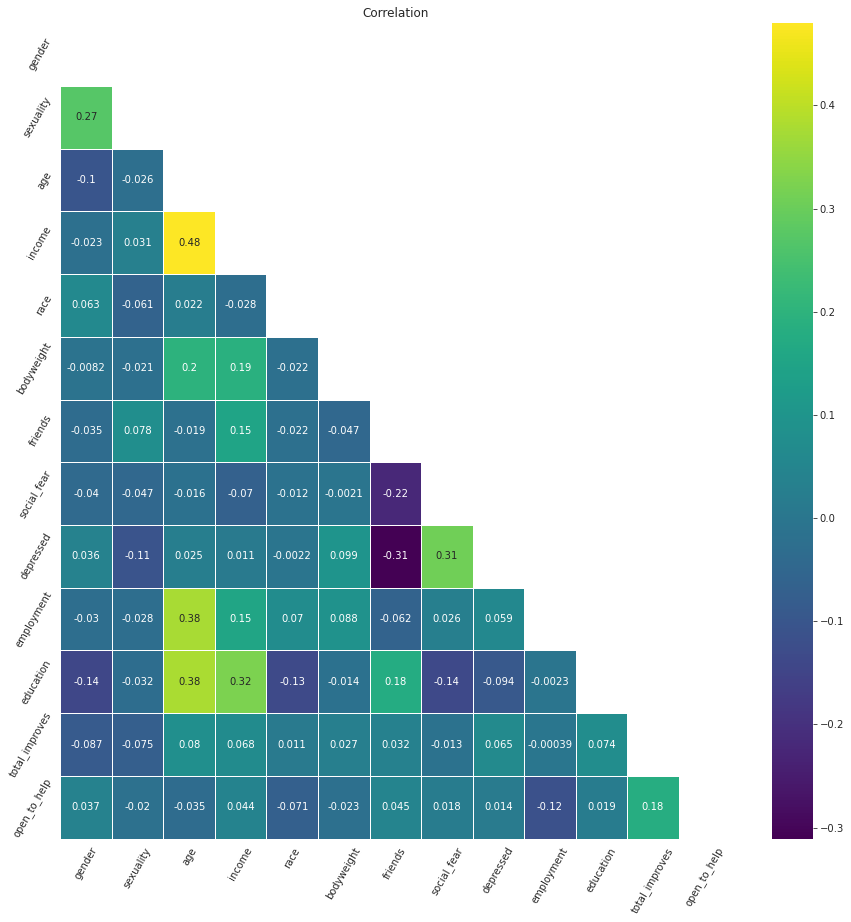

In [70]:
heatmap_data(X, 'spearman')